In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!nvidia-smi

Mon Mar  6 18:43:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install ultralytics==8.0.20 --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="i5a31149ZXb5vXFpPtOS")
project = rf.workspace("ds-sdvyu").project("aml-ass1")
dataset = project.version(2).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to aml-ass1-2 in yolov8:: 100%|██████████| 696/696 [00:00<00:00, 1658.52it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 345MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/aml-ass1-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

In [7]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/aml-ass1-2/valid/labels.cache... 26 images, 2 backgrounds, 0 corrupt: 100% 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.17it/s]
                   all         26         51      0.897      0.821      0.876      0.497
            Burn green         26         26      0.858      0.962       0.93      0.516
              Red Bool         26         25      0.936       0.68      0.822      0.478
Speed: 10.8ms pre-process, 16.2ms inference, 0.0ms loss, 2.1ms post-process per image


/content


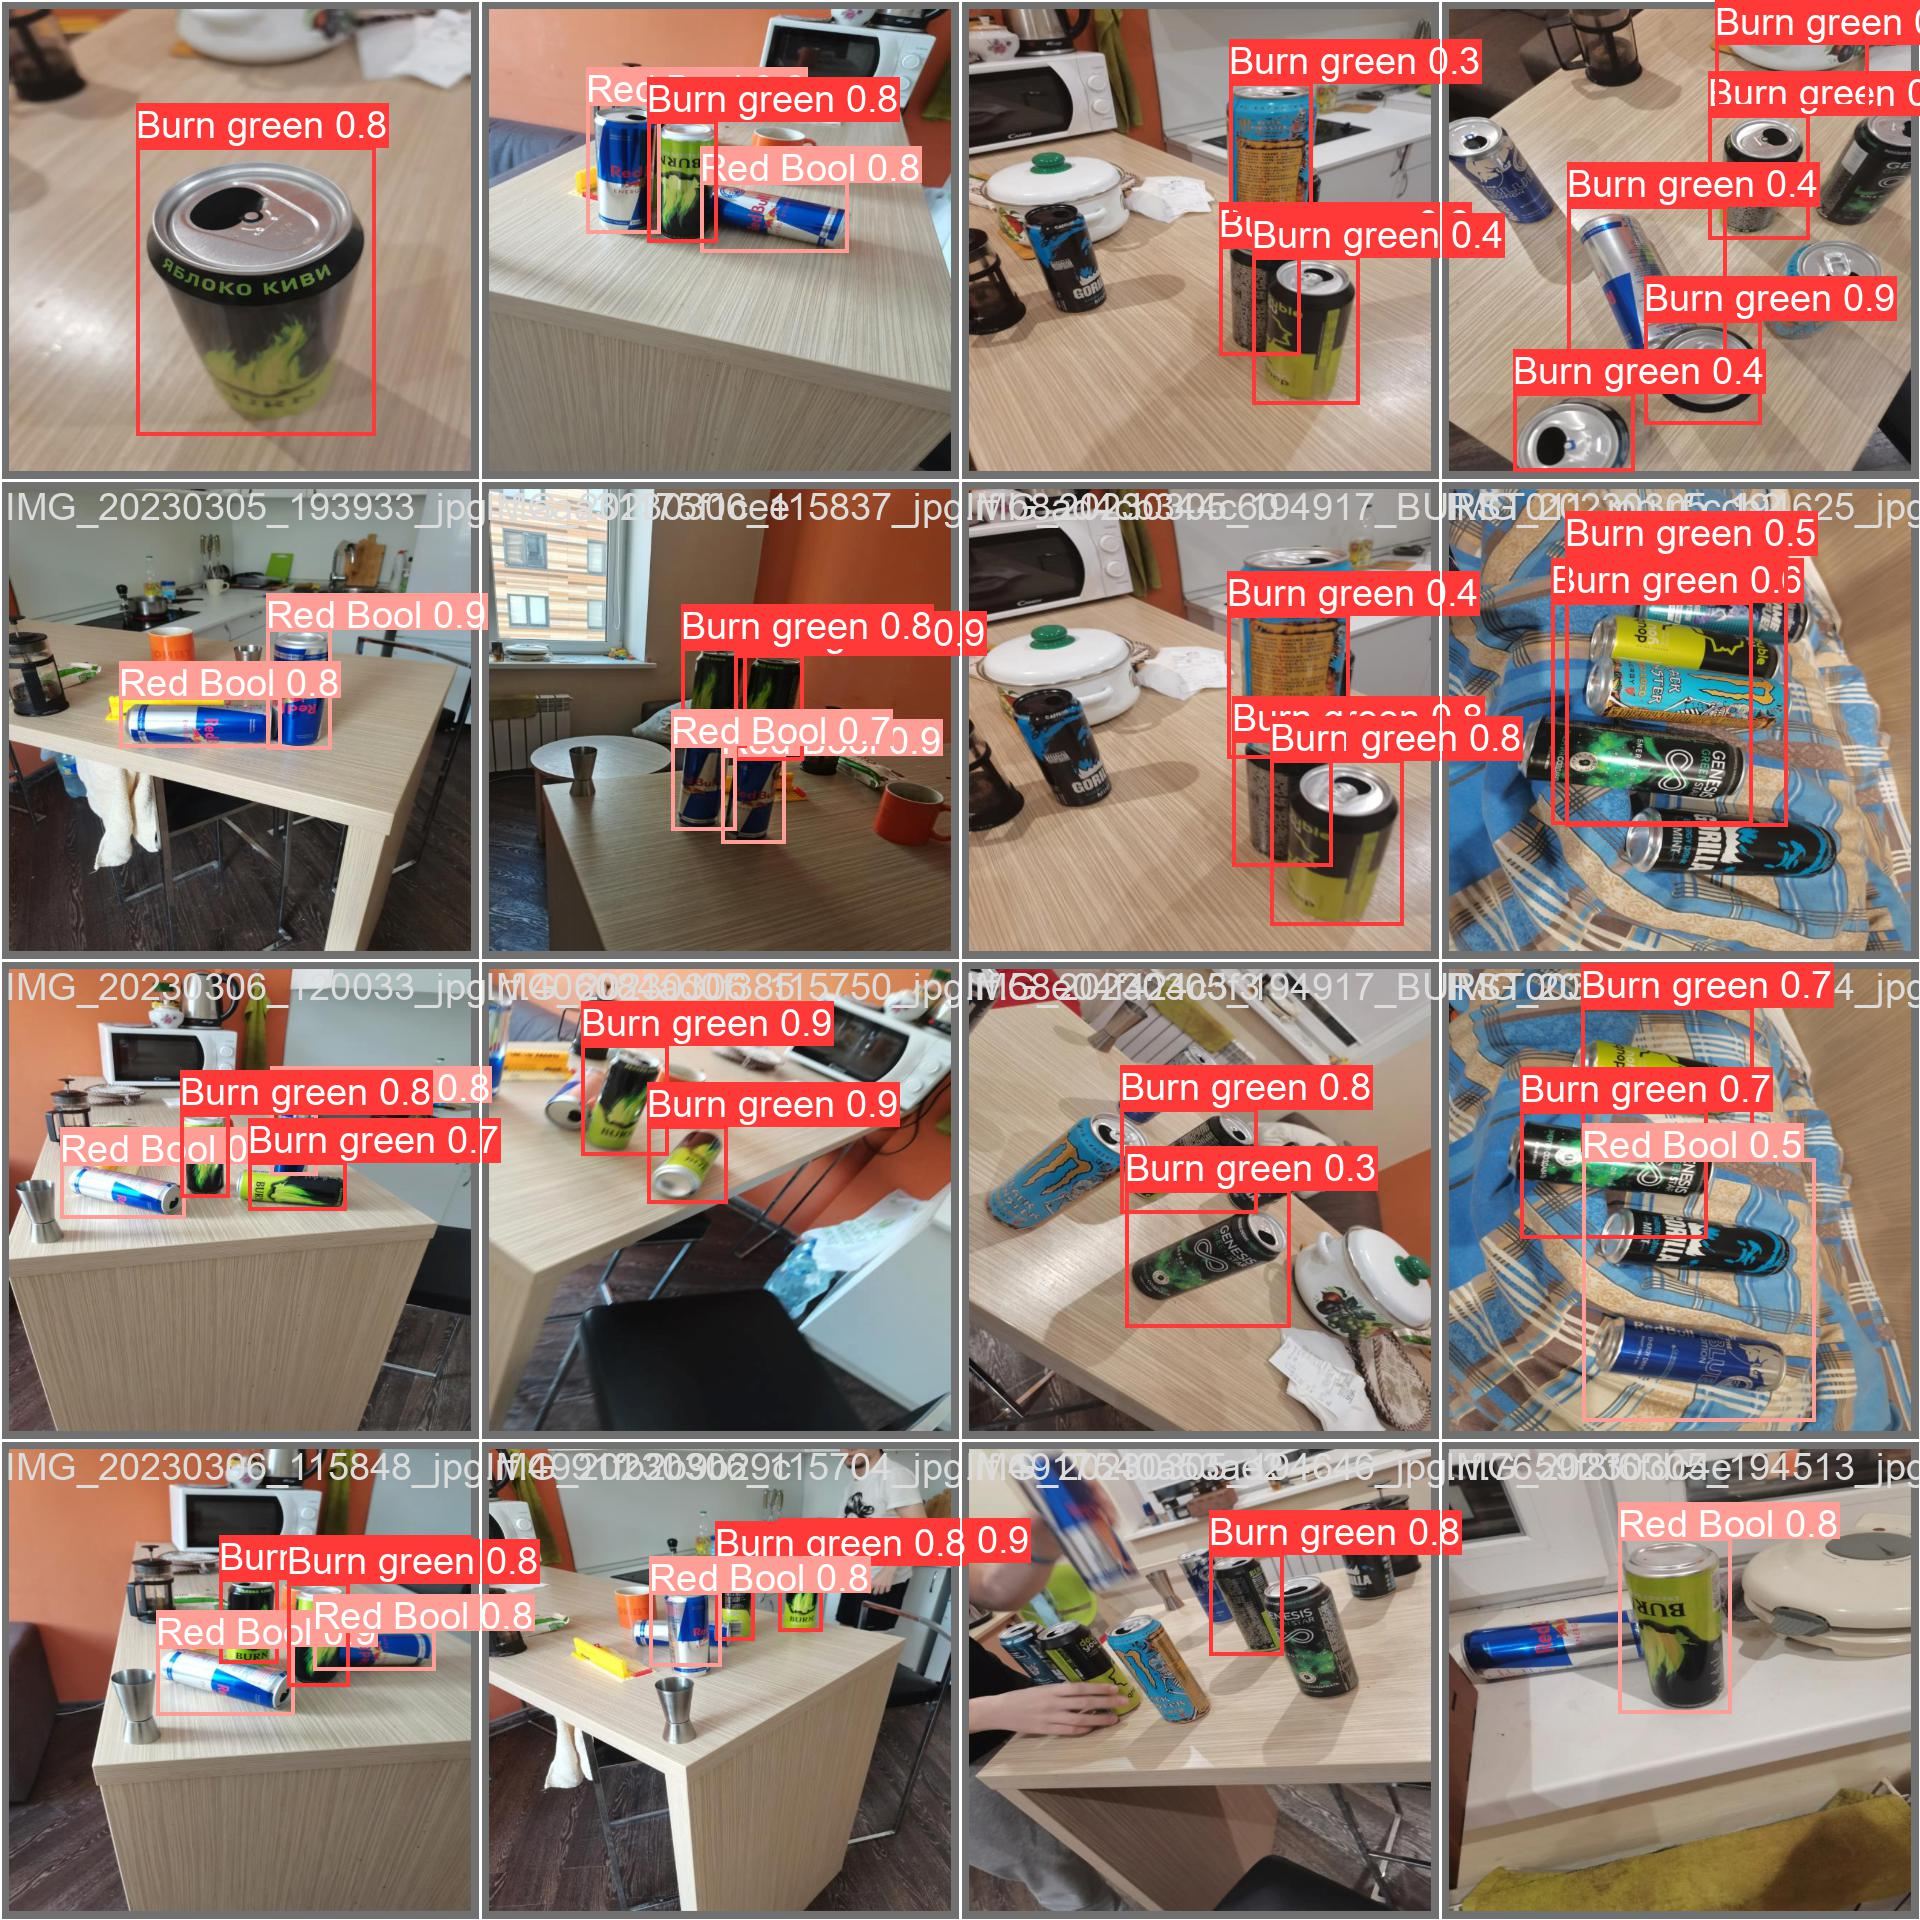

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [9]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/16 /content/datasets/aml-ass1-2/test/images/IMG-20230305-WA0004_jpg.rf.5d3f59c09c6719cf52bb1013110861ba.jpg: 800x800 1 Burn green, 26.1ms
image 2/16 /content/datasets/aml-ass1-2/test/images/IMG_20230305_193938_jpg.rf.6bfa4d4a0bf3b80dc40452468d9fb3bb.jpg: 800x800 1 Burn green, 26.2ms
image 3/16 /content/datasets/aml-ass1-2/test/images/IMG_20230305_194011_jpg.rf.73acbad1c0acd2783108be3bfe9fac9b.jpg: 800x800 1 Burn green, 26.1ms
image 4/16 /content/datasets/aml-ass1-2/test/images/IMG_20230305_194159_jpg.rf.e86a081ac892d076a5d8e3397671cf2d.jpg: 800x800 1 Red Bool, 26.2ms
image 5/16 /content/datasets/aml-ass1-2/test/images/IMG_20230305_194212_jpg.rf.9c2b005b94ee6616172fccd986d6f44a.jpg: 800x800 1 Red Bool, 26.1ms
image 6/16 /content/datasets/aml-ass1-2/test/images/IMG_20230305_194322_jpg.rf.60659f92d769ebb8e2

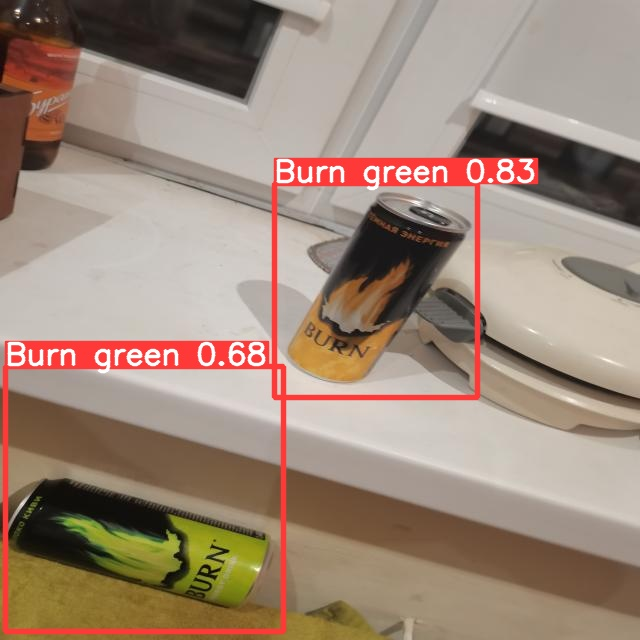

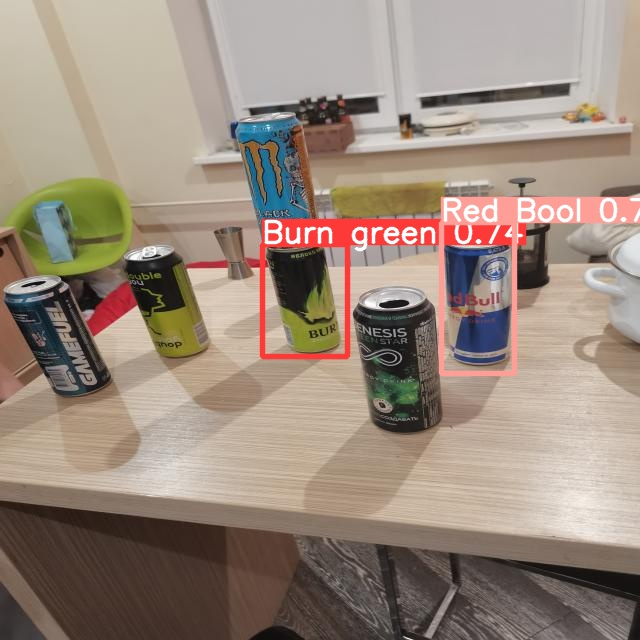

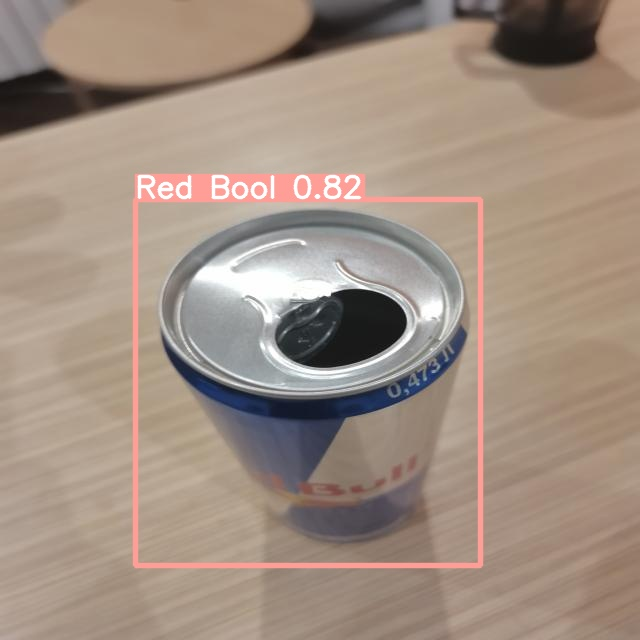

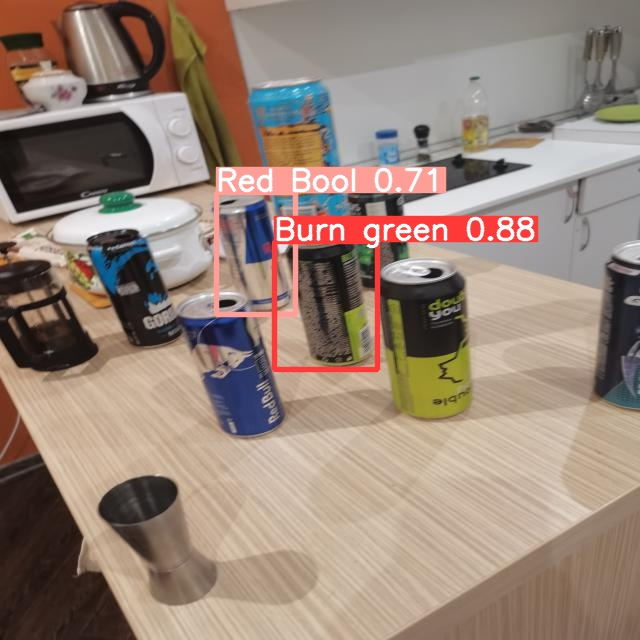

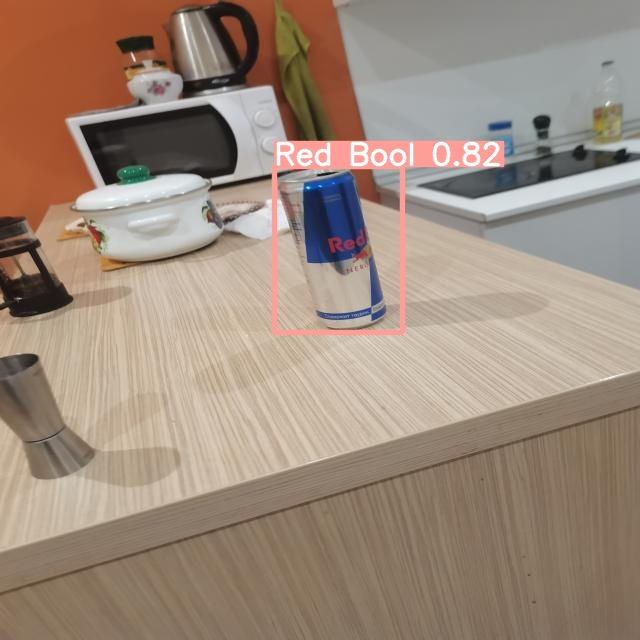

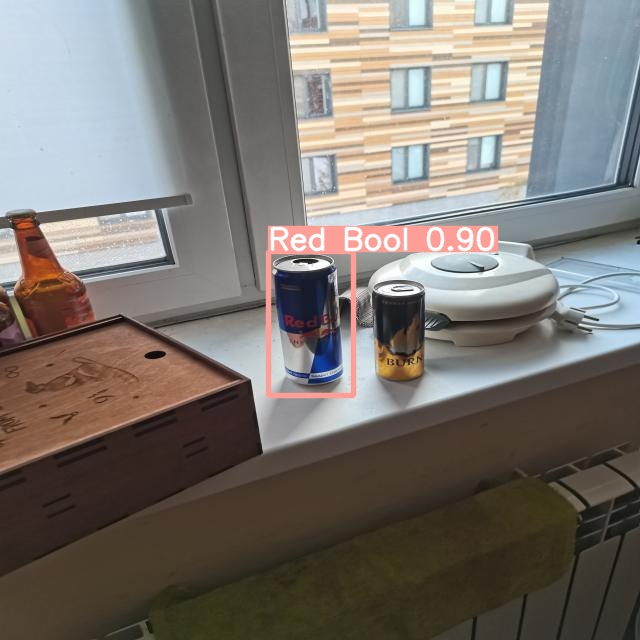

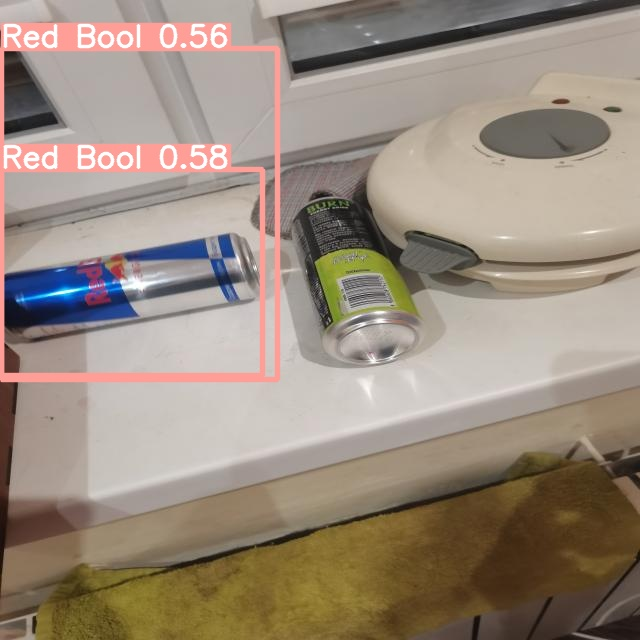

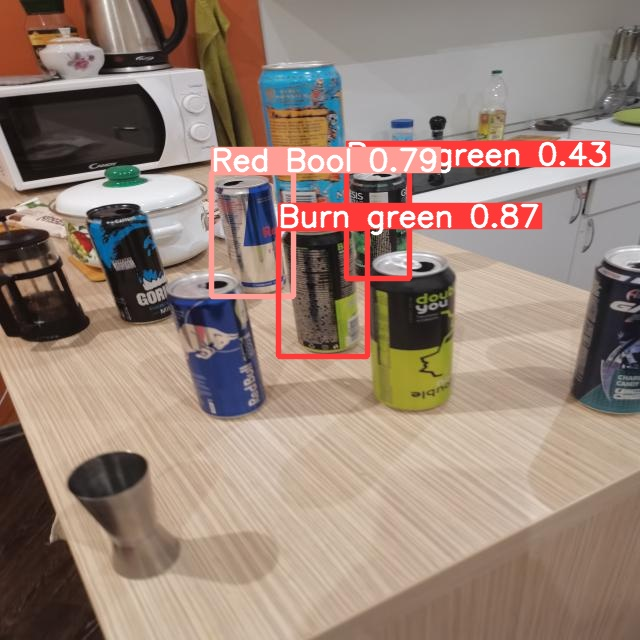

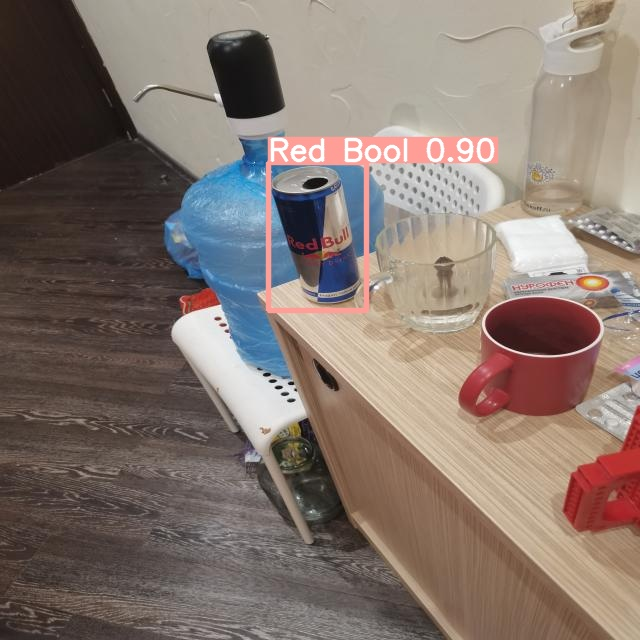

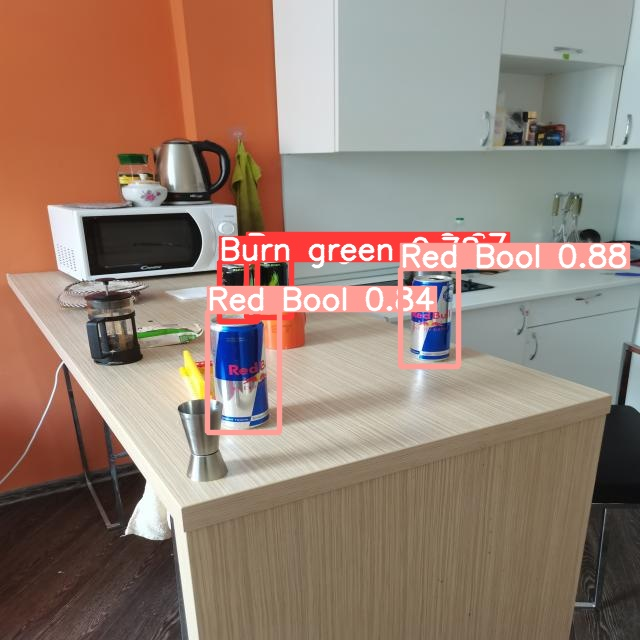

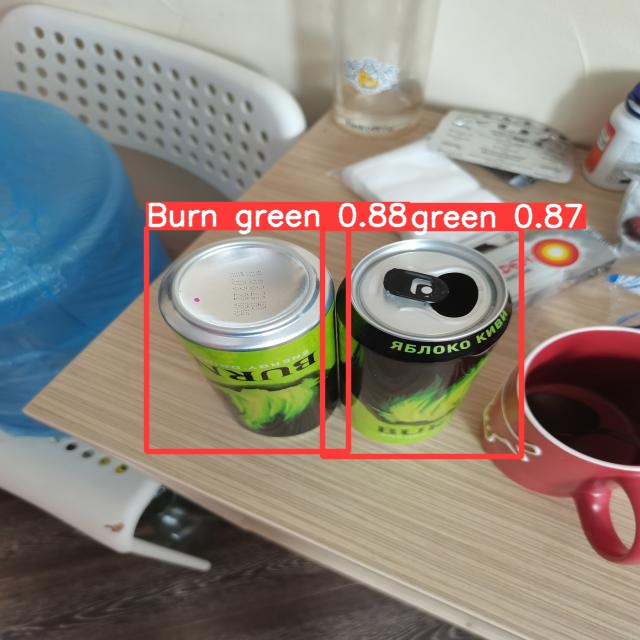

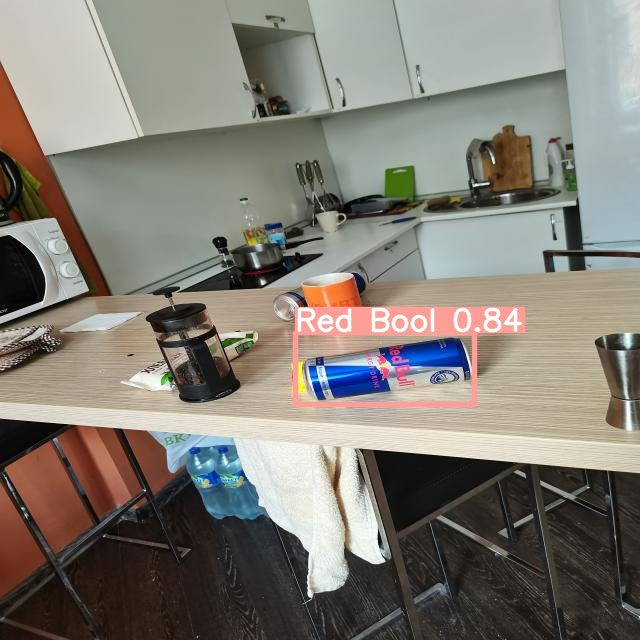

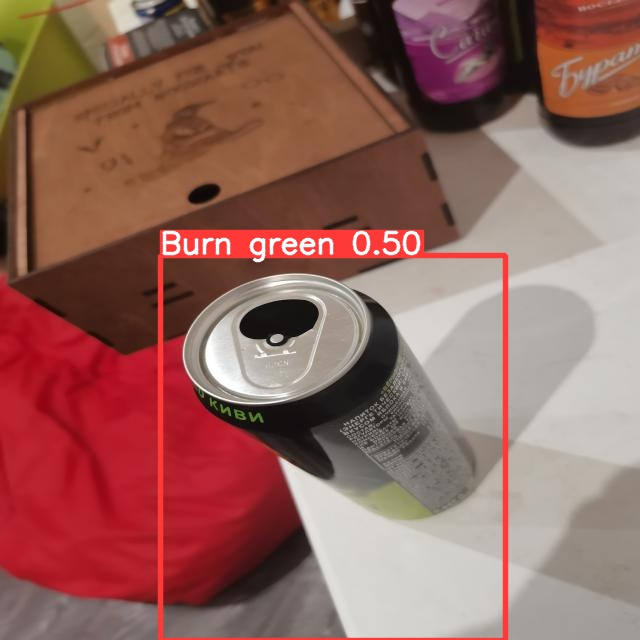

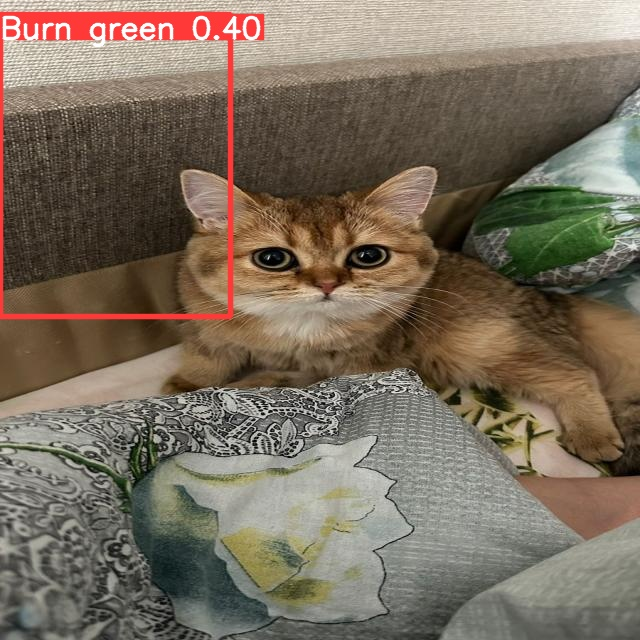

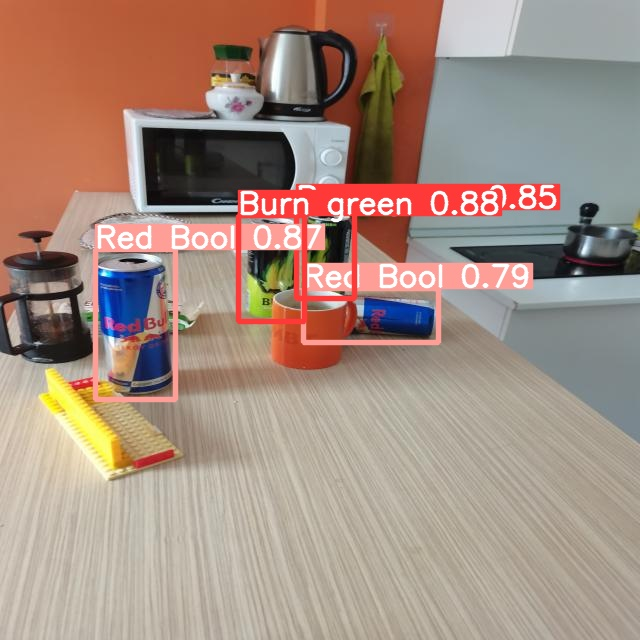

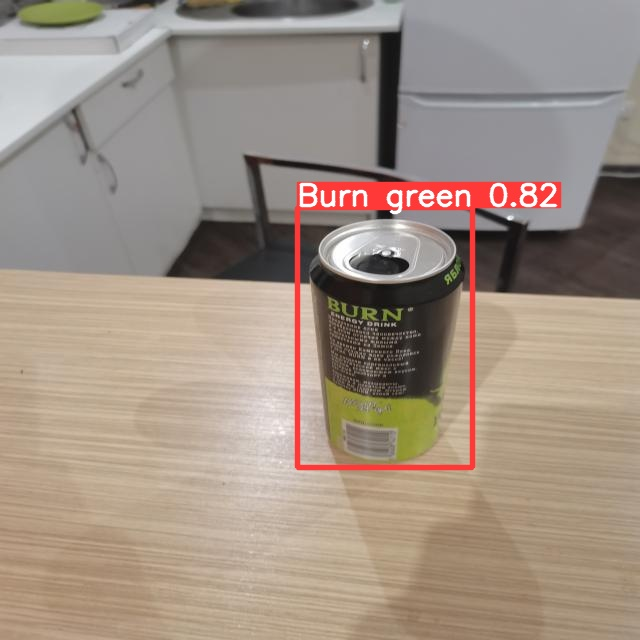

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

/content


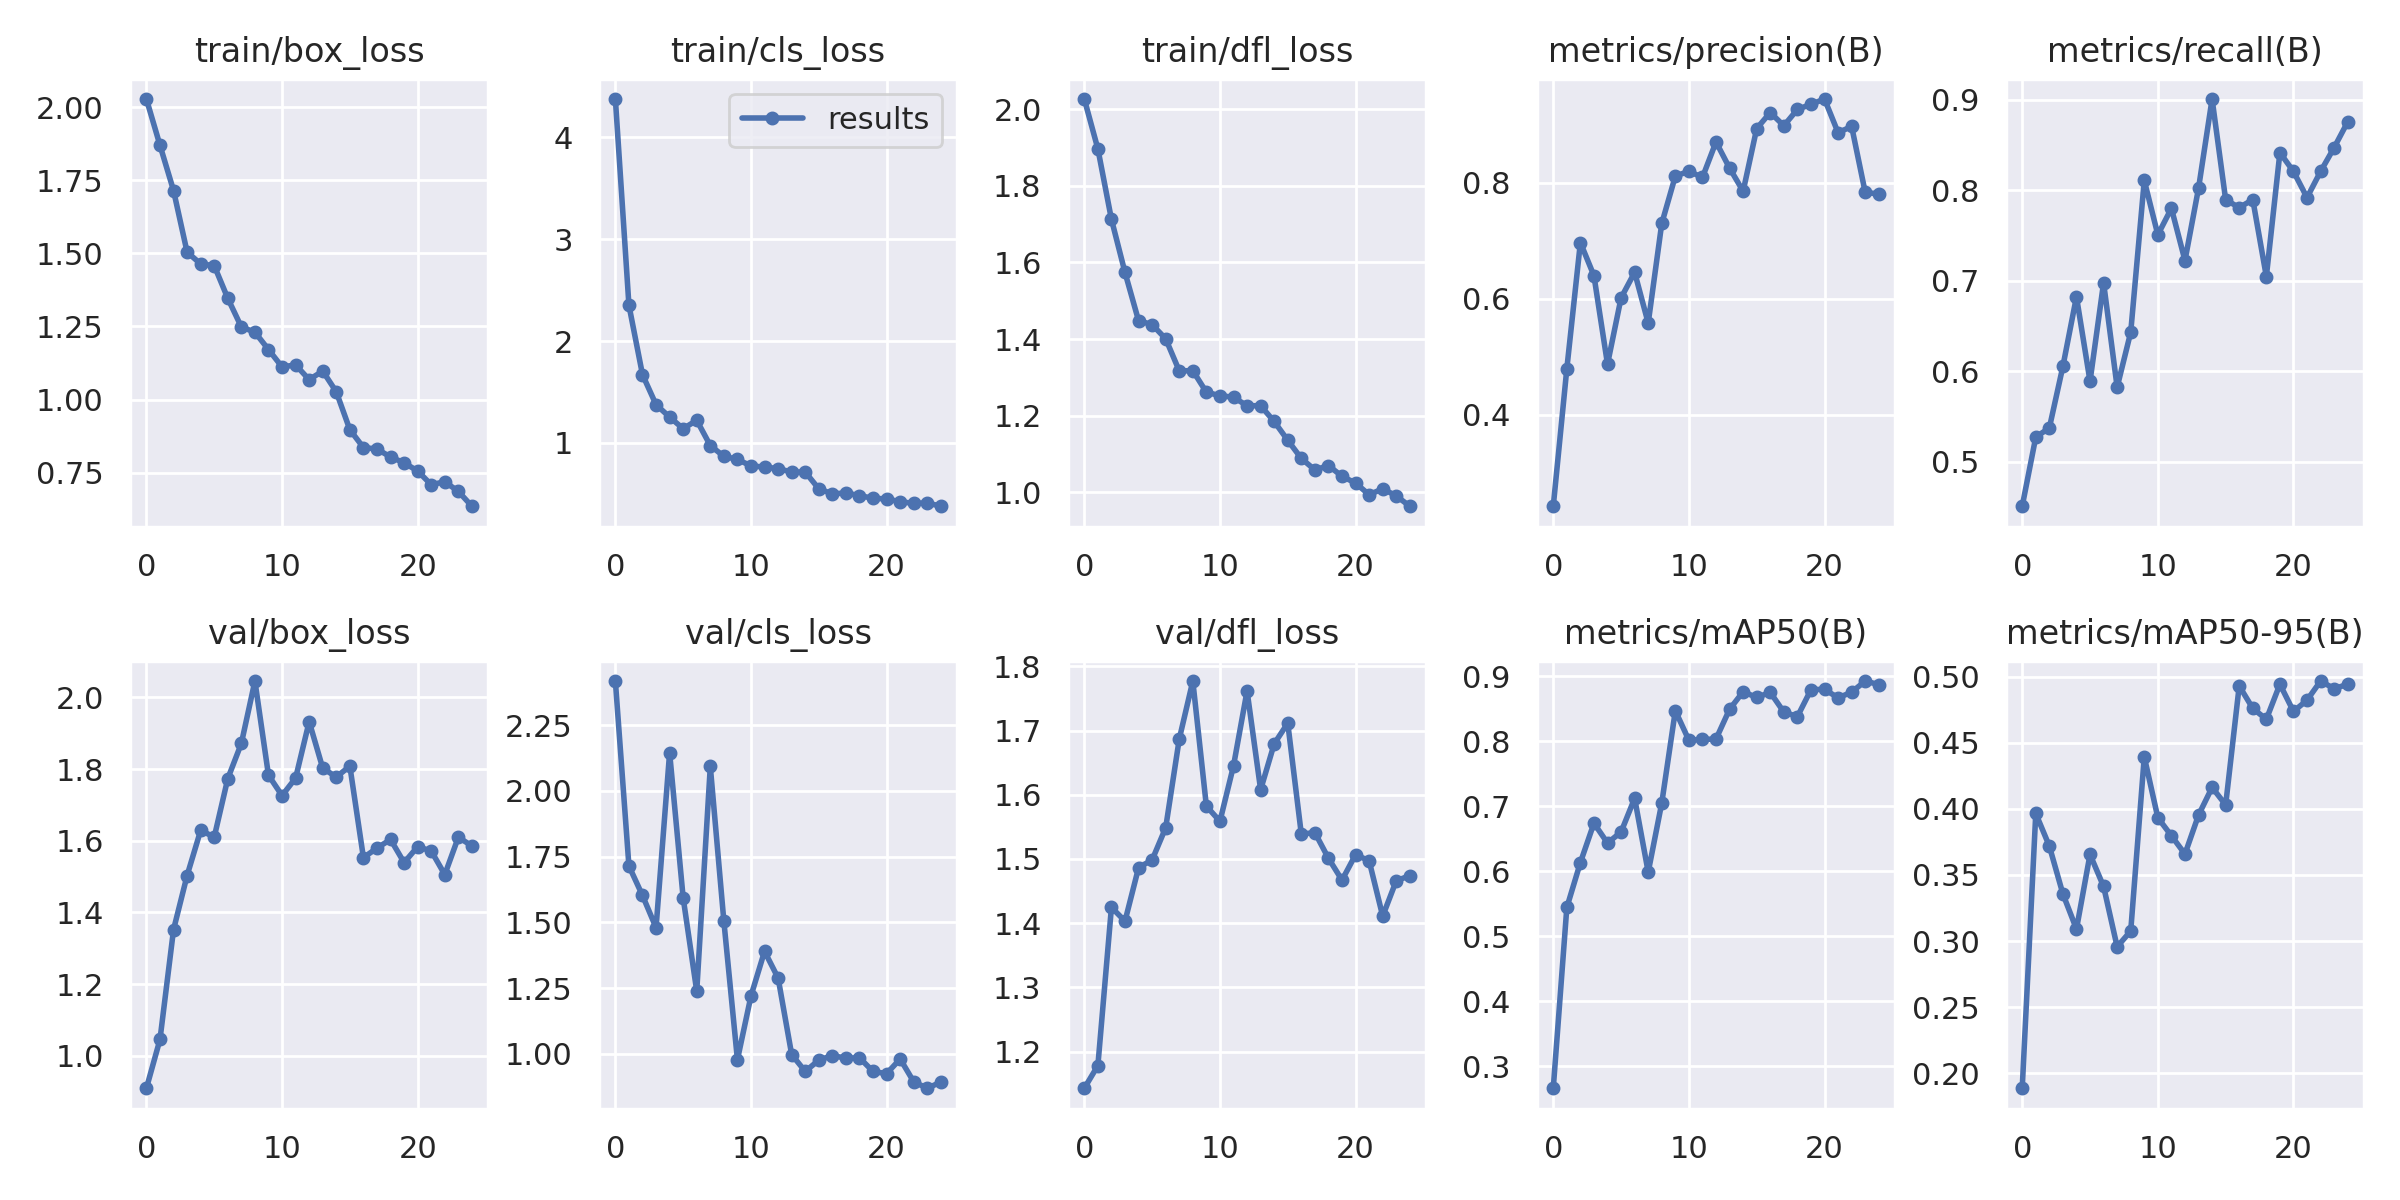

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)